# Workbook Objective: 
### Draw insights from ACT testing data and California housing values
_____

#
#### Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#
#### Import data

In [51]:
ca_fips = pd.read_csv('./data-clean/ca_fips.csv')
df_housing = pd.read_csv('./data-clean/housing_values_2021.csv')
df_county = pd.read_csv('./data-clean/best_counties.csv')

#
#### Populate color scheme dictionary

In [52]:
colors_h = {
    '1'         : '#f0541b',   # Public
    '2'         : '#fc742f',
    '3'         : '#F29544',
    '4'         : '#f7ae65',
    '5'         : '#fdd69a',
    '6'         : '#F2ECCE',
    '7'         : '#aae9ee',
    '8'         : '#6bc8cf',
    '9'         : '#50ABBF',
    '10'        : '#3F9BBF',
    '11'        : '#4285f4',
    '12'        : '#1B65A6',   # Charter
    'charter'   : '#f0541b',
    'public'    : '#1B65A6',
    'edge'      : '#cccccc',
    'bg'        : '#E0E0E0',
}

#
#### Inspect the data

In [53]:
# Categorical variables assigned by the State of California. Will use for graphing
ca_fips.head()

,fips,county_name
0,6001,Alameda
1,6003,Alpine
2,6005,Amador
3,6007,Butte
4,6009,Calaveras


In [54]:
df_housing.head()

,county_name,med_home_value
0,Alameda,854696
1,Alpine,419080
2,Amador,359884
3,Butte,377765
4,Calaveras,366538


In [55]:
df_county.head()

,county_name,is_charter,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct
0,Santa Cruz,1,1.0,90.0,48.0,0.53,29.00,29.00,27.00,27.00,28.00,0.96
1,Shasta,1,1.0,127.0,24.0,0.19,28.00,27.00,27.00,27.00,27.25,0.88
2,Santa Clara,0,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27.14,0.83
3,Alameda,0,30.0,12798.0,2865.0,0.22,26.26,26.07,25.82,25.28,25.86,0.78
4,Marin,0,7.0,2319.0,740.0,0.32,26.63,26.30,25.06,24.87,25.72,0.80


#
#### Merge data for graphing

In [56]:
df_county = pd.merge(df_county, df_housing, on='county_name')

In [57]:
df_county.head()

,county_name,is_charter,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct,med_home_value
0,Santa Cruz,1,1.0,90.0,48.0,0.53,29.00,29.00,27.00,27.00,28.00,0.96,925173
1,Santa Cruz,0,8.0,2131.0,502.0,0.24,22.32,21.05,21.38,21.41,21.54,0.52,925173
2,Shasta,1,1.0,127.0,24.0,0.19,28.00,27.00,27.00,27.00,27.25,0.88,327189
3,Shasta,0,3.0,859.0,98.0,0.11,26.00,23.94,23.47,23.94,24.34,0.82,327189
4,Santa Clara,0,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27.14,0.83,1187214


In [58]:
ca_fips.head()

,fips,county_name
0,6001,Alameda
1,6003,Alpine
2,6005,Amador
3,6007,Butte
4,6009,Calaveras


In [59]:
df_county = pd.merge(df_county, ca_fips, how='left', on='county_name'.lower())

In [60]:
df_county.head()

,county_name,is_charter,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct,med_home_value,fips
0,Santa Cruz,1,1.0,90.0,48.0,0.53,29.00,29.00,27.00,27.00,28.00,0.96,925173,6087
1,Santa Cruz,0,8.0,2131.0,502.0,0.24,22.32,21.05,21.38,21.41,21.54,0.52,925173,6087
2,Shasta,1,1.0,127.0,24.0,0.19,28.00,27.00,27.00,27.00,27.25,0.88,327189,6089
3,Shasta,0,3.0,859.0,98.0,0.11,26.00,23.94,23.47,23.94,24.34,0.82,327189,6089
4,Santa Clara,0,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27.14,0.83,1187214,6085


In [61]:
df_county.isna().sum()

county_name       0
is_charter        0
num_schools       0
enrollment        0
test_takers       0
pct_takers        0
avg_read          0
avg_eng           0
avg_math          0
avg_sci           0
comp_score        0
abv_avg_pct       0
med_home_value    0
fips              0
dtype: int64

In [62]:
df_county['comp_score'] = df_county['comp_score'].apply(lambda x: int(round(x, 0)))

In [63]:
df_county.head()

,county_name,is_charter,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct,med_home_value,fips
0,Santa Cruz,1,1.0,90.0,48.0,0.53,29.00,29.00,27.00,27.00,28,0.96,925173,6087
1,Santa Cruz,0,8.0,2131.0,502.0,0.24,22.32,21.05,21.38,21.41,22,0.52,925173,6087
2,Shasta,1,1.0,127.0,24.0,0.19,28.00,27.00,27.00,27.00,27,0.88,327189,6089
3,Shasta,0,3.0,859.0,98.0,0.11,26.00,23.94,23.47,23.94,24,0.82,327189,6089
4,Santa Clara,0,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27,0.83,1187214,6085


### Plot ACT scores by county against median home values in California Counties

In [64]:
# Clean a few columns for graphing
df_county['is_charter'] = df_county['is_charter'].replace(1, 'Charter').replace(0, 'Public')        # make actual labels
df_county['med_home_value'] = df_county['med_home_value'].apply(lambda x: int(round(x/1000, 0)))    # abbreviate housing values
df_county.head()

,county_name,is_charter,num_schools,enrollment,test_takers,pct_takers,avg_read,avg_eng,avg_math,avg_sci,comp_score,abv_avg_pct,med_home_value,fips
0,Santa Cruz,Charter,1.0,90.0,48.0,0.53,29.00,29.00,27.00,27.00,28,0.96,925,6087
1,Santa Cruz,Public,8.0,2131.0,502.0,0.24,22.32,21.05,21.38,21.41,22,0.52,925,6087
2,Shasta,Charter,1.0,127.0,24.0,0.19,28.00,27.00,27.00,27.00,27,0.88,327,6089
3,Shasta,Public,3.0,859.0,98.0,0.11,26.00,23.94,23.47,23.94,24,0.82,327,6089
4,Santa Clara,Public,36.0,16592.0,3816.0,0.23,27.39,27.34,27.15,26.67,27,0.83,1187,6085


### Graph ACT test scores against median housing values in California

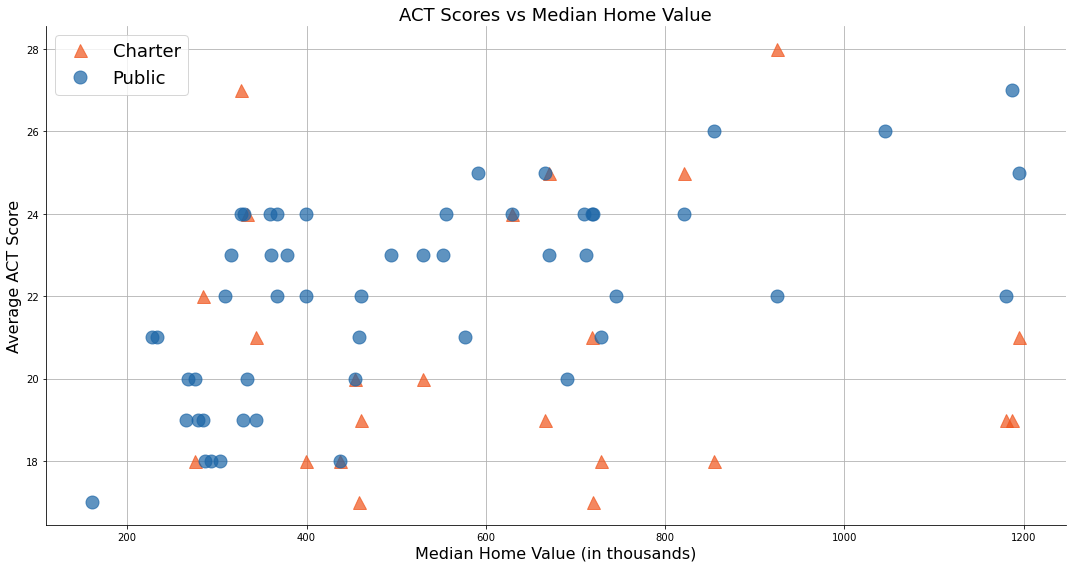

In [70]:
# Plot All

# Data
by_county = df_county.groupby(by='is_charter')

markers = ['^', 'o']
colors = [colors_h['charter'], colors_h['public']]

# Figure
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('ACT Scores vs Median Home Value', size=18)

# Labels
ax.set_xlabel('Median Home Value (in thousands)', size=16)
ax.set_ylabel('Average ACT Score', size=16)

# Plot
for (name, is_charter), marker, color in zip(by_county, markers, colors):
    ax.plot(is_charter['med_home_value'], is_charter['comp_score'], marker=marker, color=color, alpha=.7, linestyle='', ms=13, label=name)

# Graph
ax.legend(prop={'size': 18})
plt.tight_layout()
sns.despine()
plt.grid()
plt.show()

# Adapted from https://stackoverflow.com/questions/27711078/scatter-plots-in-pandas-pyplot-how-to-plot-by-category-with-different-markers

### Graph Public school ACT test scores against median home value

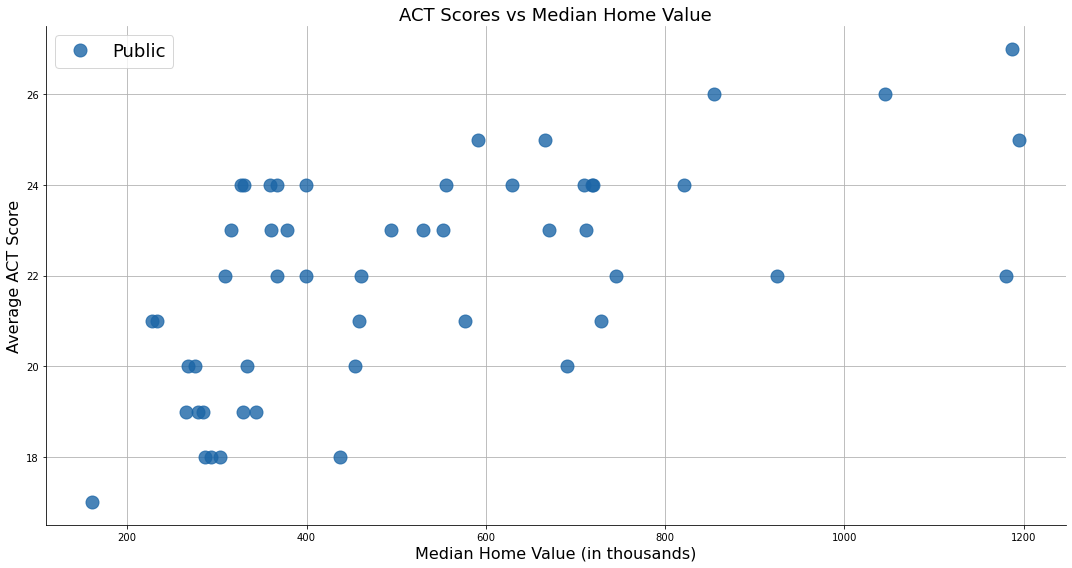

In [71]:
# Plot Public

# Data
by_county = df_county.groupby(by='is_charter')

markers = ['^', 'o']
colors = [colors_h['charter'], colors_h['public']]

# Figure
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('ACT Scores vs Median Home Value', size=18)

# Labels
ax.set_xlabel('Median Home Value (in thousands)', size=16)
ax.set_ylabel('Average ACT Score', size=16)

# Plot
for (name, is_charter), marker, color in zip(by_county, markers, colors):
    if name == 'Public':
        ax.plot(is_charter['med_home_value'], is_charter['comp_score'], marker=marker, color=color, alpha=.8, linestyle='', ms=13, label=name)

# Graph
ax.legend(prop={'size': 18})
plt.tight_layout()
sns.despine()
plt.grid()
plt.show()

# Adapted from https://stackoverflow.com/questions/27711078/scatter-plots-in-pandas-pyplot-how-to-plot-by-category-with-different-markers

### Graph Charter school ACT test scores against median home value

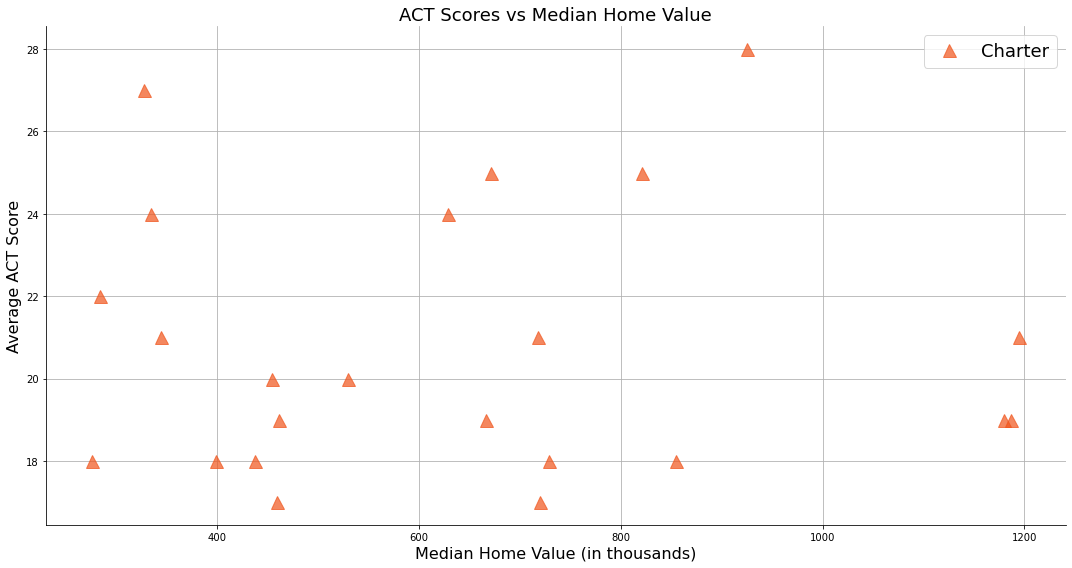

In [72]:
# Plot Charter

# Data
by_county = df_county.groupby(by='is_charter')

markers = ['^', 'o']
colors = [colors_h['charter'], colors_h['public']]

# Figure
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('ACT Scores vs Median Home Value', size=18)

# Labels
ax.set_xlabel('Median Home Value (in thousands)', size=16)
ax.set_ylabel('Average ACT Score', size=16)

# Plot
for (name, is_charter), marker, color in zip(by_county, markers, colors):
    if name == 'Charter':
        ax.plot(is_charter['med_home_value'], is_charter['comp_score'], marker=marker, color=color, alpha=.7, linestyle='', ms=13, label=name)

# Graph
ax.legend(prop={'size': 18})
plt.tight_layout()
sns.despine()
plt.grid()
plt.show()

# Adapted from https://stackoverflow.com/questions/27711078/scatter-plots-in-pandas-pyplot-how-to-plot-by-category-with-different-markers

### Graph ACT test scores against median home value in 'affordable' Counties

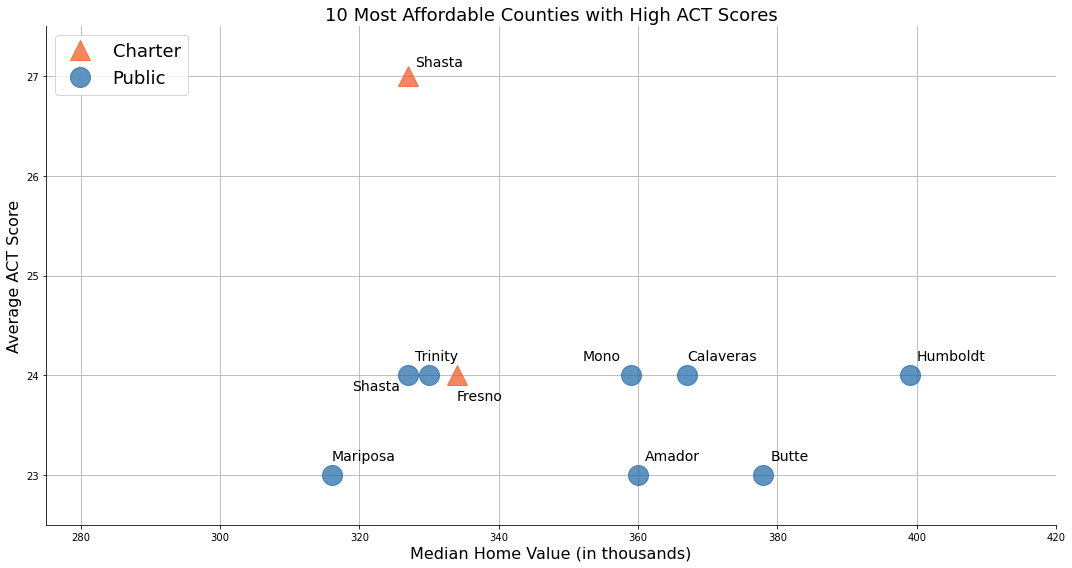

In [75]:
# Plot Zoomed Affordable

# Data
by_county = df_county.groupby(by='is_charter')

markers = ['^', 'o']
colors = [colors_h['charter'], colors_h['public']]

# Figure
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('10 Most Affordable Counties with High ACT Scores', size=18)

# Labels
labels = [
    ('Shasta', 'Charter', (328, 27.1)), ('Fresno', 'Charter', (334, 23.75)), ('Shasta', 'Public', (319, 23.85)), 
    ('Mono', 'Public', (352, 24.15)), ('Humboldt', 'Public', (400, 24.15)), ('Calaveras', 'Public', (367, 24.15)),
    ('Trinity', 'Public', (328, 24.15)), ('Butte', 'Public', (379, 23.15)), ('Amador', 'Public', (361, 23.15)), 
    ('Mariposa', 'Public', (316, 23.15)), 
]
ax.set_xlabel('Median Home Value (in thousands)', size=16)
ax.set_ylabel('Average ACT Score', size=16)

plt.xlim([275, 420])
plt.ylim([22.5, 27.5])

# Plot
for (name, is_charter), marker, color in zip(by_county, markers, colors):
    ax.plot(is_charter['med_home_value'], is_charter['comp_score'], marker=marker, color=color, alpha=.7, linestyle='', ms=20, label=name)

for label in labels:
    plt.annotate(label[0], xy=(label[2][0], label[2][1]), size=14)

# Graph
ax.legend(prop={'size': 18})
plt.grid()
plt.tight_layout()
sns.despine()
plt.show()

# Adapted from https://stackoverflow.com/questions/27711078/scatter-plots-in-pandas-pyplot-how-to-plot-by-category-with-different-markers
# label annotations adapted from: https://www.delftstack.com/howto/matplotlib/matplotlib-label-scatter-plot-points/#add-label-to-scatter-plot-points-using-the-matplotlib.pyplot.annotate-function

### Graph school ACT test scores against median home value amongst all California Counties

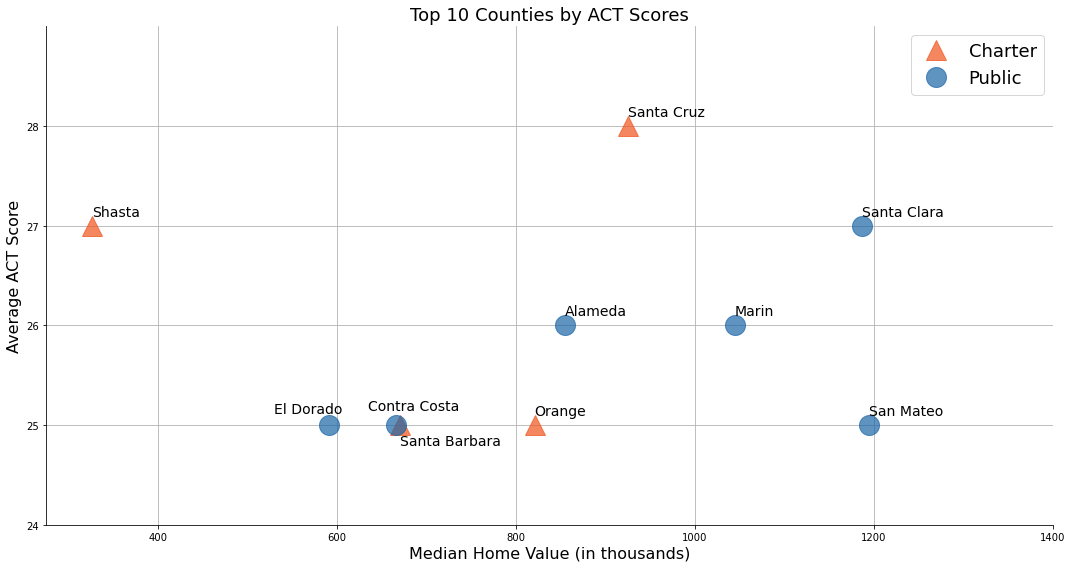

In [78]:
# Plot Zoomed Top

# Data
by_county = df_county.groupby(by='is_charter')

markers = ['^', 'o']
colors = [colors_h['charter'], colors_h['public']]

# Figure
plt.figure(figsize=(15, 8))
ax = plt.subplot()
ax.set_title('Top 10 Counties by ACT Scores', size=18)

# Labels
labels = [
    ('Santa Cruz', 'Charter', (925, 28.1)), ('Shasta', 'Charter', (327, 27.1)), ('Santa Barbara', 'Charter', (671, 24.8)), ('Orange', 'Charter', (821, 25.1)), 
    ('Santa Clara', 'Public', (1187, 27.1)), ('Alameda', 'Public', (855, 26.1)), ('Marin', 'Public', (1045, 26.1)), ('San Mateo', 'Public', (1195, 25.1)), 
    ('Contra Costa', 'Public', (635, 25.15)), ('El Dorado', 'Public', (530, 25.12))
]

plt.xlim([275, 1400])
plt.ylim([24, 29])
y_start, y_end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(y_start, y_end, 1))

ax.set_xlabel('Median Home Value (in thousands)', size=16)
ax.set_ylabel('Average ACT Score', size=16)

# Plot
for (name, is_charter), marker, color in zip(by_county, markers, colors):
    ax.plot(is_charter[is_charter['comp_score'] > 24]['med_home_value'], is_charter[is_charter['comp_score'] > 24]['comp_score'], marker=marker, 
    color=color, alpha=.7, linestyle='', ms=20, label=name)

for label in labels:
    plt.annotate(label[0], xy=(label[2][0], label[2][1]), size=14)

# Graph
ax.legend(prop={'size': 18})
plt.grid()
plt.tight_layout()
sns.despine()
plt.show()

# Adapted from https://stackoverflow.com/questions/27711078/scatter-plots-in-pandas-pyplot-how-to-plot-by-category-with-different-markers
# label annotations adapted from: https://www.delftstack.com/howto/matplotlib/matplotlib-label-scatter-plot-points/#add-label-to-scatter-plot-points-using-the-matplotlib.pyplot.annotate-function

### Graph ACT scores for all California Counties

In [84]:
import plotly.figure_factory as ff

# Data
fips = df_county['fips'].to_list()
values = df_county['comp_score'].to_list()
colorscale = [
    colors_h['12'],
    colors_h['11'],
    colors_h['10'],
    colors_h['9'],
    colors_h['8'],
    colors_h['7'],
    colors_h['6'],
    colors_h['5'],
    colors_h['4'],
    colors_h['3'],
    colors_h['2'],
    colors_h['1'],
]   

# Plot
fig = ff.create_choropleth(
    title='Average ACT Score in California High Schools',
    fips=fips, values=values,
     scope=['CA'],
     county_outline={'color': colors_h['edge'], 'width': 1},
     state_outline={'color': colors_h['edge'], 'width': 1},
     round_legend_values=False,
     legend_title='ACT Score',
     colorscale=colorscale
     )

# Figure
fig.update_layout(
    autosize=True,
    legend_x = 1,
    annotations = {'x': -0.12, 'xanchor': 'right'}
)

# Graph
fig.layout.template = None
fig.show()

# Adapted from: https://plotly.com/python/county-choropleth/

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:359: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:363: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_count

##### Counties in white did not have sufficient data points

### Graph ACT scores top 10 California Counties

In [85]:
# Top Counties

# Data
fips = [6087, 6089, 6083, 6059, 6085, 6001, 6041, 6081, 6013, 6017]
# values = ['Santa Cruz', 'Shasta', 'Santa Barbara', 'Orange', 'Santa Clara', 'Alameda', 'Marin', 'San Mateo', 'Contra Costa', 'El Dorado']
act_values = [28, 27, 25, 25, 27, 26, 26, 25, 25, 25]
colorscale = [
    colors_h['6'],
    colors_h['5'],
    colors_h['2'],
    colors_h['1'],
]    

# Plot
fig = ff.create_choropleth(
    title='Counties with Highest Average ACT Score',
    fips=fips, values=act_values,
     scope=['CA'],
     colorscale=colorscale,
     county_outline={'color': colors_h['edge'], 'width': 1.25},
     state_outline={'color': colors_h['edge'], 'width': 1.25},
     round_legend_values=False,
     legend_title='ACT Score',
     )

# Figure
fig.update_layout(
    autosize=True,
    legend_x = 1,
    annotations = {'x': -0.12, 'xanchor': 'right'}
)

# Graph
fig.layout.template = None
fig.show()

# Adapted from: https://plotly.com/python/county-choropleth/

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:359: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:363: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:368: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_count

In [86]:
# Top affordable counties

# Data
fips = [6089, 6019, 6051, 6023, 6009, 6105, 6007, 6005, 6043]
# values = ['Shasta', 'Fresno', 'Mono', 'Humboldt', 'Calaveras', 'Trinity', 'Butte', 'Amador', 'Mariposa']
act_values = [27, 24, 24, 24, 24, 24, 23, 23, 23]
colorscale = [
    colors_h['5'],
    colors_h['3'],
    colors_h['1'],
]    

# Plot
fig = ff.create_choropleth(
    title='Affordable Counties with High ACT Scores',
    fips=fips, values=act_values,
     scope=['CA'],
     colorscale=colorscale,
     county_outline={'color': colors_h['edge'], 'width': 1.25},
     state_outline={'color': colors_h['edge'], 'width': 1.25},
     round_legend_values=False,
     legend_title='ACT Score',
     )

# Figure
fig.update_layout(
    autosize=True,
    legend_x = 1,
    annotations = {'x': -0.12, 'xanchor': 'right'}
)

# Graph
fig.layout.template = None
fig.show()

# Adapted from: https://plotly.com/python/county-choropleth/

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:849: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/Users/genebob/opt/anaconda3/lib/python3.9/site-packages/plotly/figure_factory/_county_choropleth.py:853: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

